Name: Rylan Tuten

# Privately Owned Guns vs Crime and Safety Index
## Classification and Clustering
Source: https://www.kaggle.com/datasets/prasertk/privately-owned-guns-vs-crime-and-safety-index

## Estimated number of civilian guns per capita by country!
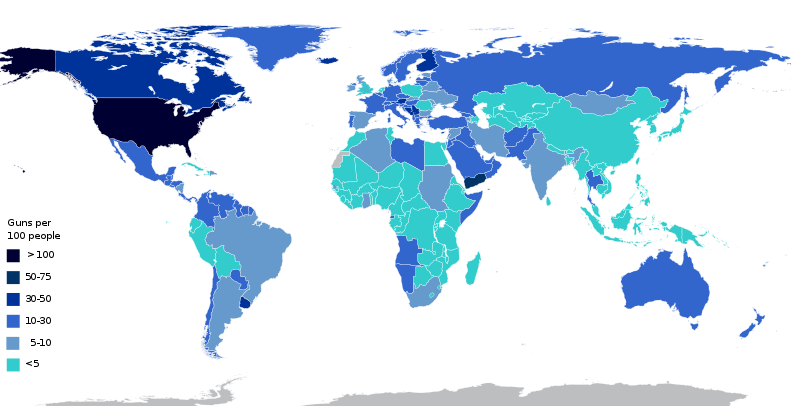

World map of civilian gun ownership. Guns (privately owned small firearms) per 100 capita in 2017. The Small Arms Survey 2017 provides estimates of the total number of civilian-owned guns in a country. It then calculates the number per 100 persons. This number for a country does not indicate the percentage of the population that owns guns. This is because individuals can own more than one gun.

In the dataset, the "Estimate of Civilian Firearms per 100 persons" column is from the annex table of Small Arms Survey 2017 (https://en.wikipedia.org/wiki/Small_Arms_Survey). The briefing paper for it says: "Numbers provided here include all firearms in civilian hands, both licit and illicit." The annex table where all the numbers in the main column come from also includes some sub-national areas and territories such as Northern Ireland, Puerto Rico, Scotland, etc.[1]

Source: https://en.wikipedia.org/wiki/Estimated_number_of_civilian_guns_per_capita_by_country

## UPLOADING THE CIVILIAN GUNS AND SAFETY DATA
### TODO 1

Run the following code to import the numpy, pandas, and matplotlib python packages. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

### TODO 2
load the csv file using pd.read_csv and store it into df_raw.

1. Download the CCR Rule Compliance Dataset at https://drive.google.com/file/d/1rJ1Hvr1YyIWeY6J3V5zUkSAk-SG3Kkhb/view?usp=sharing

2. Go to file, download as, CSV 
(this means that when downloaded, each of the values will be separated by commas as opposed to some other delimiter)

3. Drop the downloaded file into the SVSM_EDS folder on your desktop. 

4. Open the folder and right click on the dataset. Select properties. 

5. Copy the file name at the top of the General panel of the properties box. It should be something like this "Estimated number of civilian guns per capita by country". Note that the file name needs to be exact (including spaces, punctuation, capitalization, etc.). 

6. Paste the file name between the quotations and parenthesis in the cell below

7. Run the cell to show the dataframe 

In [4]:
df_raw = pd.read_csv("Estimated number of civilian guns per capita by country.csv")
#to read and store the dataset in a dataframe called df_raw

df_raw
#to show the dataframe

,Country or subnational area,Estimate of civilian firearms per 100 persons,Region,Subregion,Population 2017,Estimate of firearms in civilian possession,Computation method,Registered firearms,Unregistered firearms,Crime Index,Safety Index
0,Afghanistan,12.5,Asia,South Asia,34169000,4270000.0,2,NaN,NaN,77.01,22.99
1,Albania,12.0,Europe,Southern Europe,2911000,350000.0,2,"65,747","284,253",46.08,53.92
2,Algeria,2.1,Africa,North Africa,41064000,877000.0,2,"200,000","677,000",53.82,46.18
3,American Samoa,0.7,Oceania,Polynesia,56000,400.0,2,250,150,NaN,NaN
4,Andorra,14.1,Europe,Southern Europe,69000,10000.0,3,"7,599","2,401",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
225,Venezuela,18.5,Americas,South America,31926000,5895000.0,2,NaN,NaN,83.58,16.42
226,Vietnam,1.6,Asia,South-East Asia,95415000,1562000.0,2,NaN,NaN,45.81,54.19
227,Yemen,52.8,Asia,Western Asia,28120000,14859000.0,2,NaN,NaN,NaN,NaN
228,Zambia,0.9,Africa,East Africa,17238000,158000.0,2,"86,642","71,358",46.28,53.72


## UNDERSTANDING THE DATA
### TODO 3
1. Scroll through the data to understand what is included. 

Read about the Crime and Safety Indexes at: https://www.numbeo.com/crime/indices_explained.jsp to see how they are calculated and how to interpret them. 

## UNSUPERVISED LEARNING
### Classification vs. Clustering

Classification and clustering are two methods of pattern identification used in machine learning. Although both techniques have certain similarities, the difference lies in the fact that classification uses predefined classes in which objects are assigned, while clustering identifies similarities between objects, which it groups according to those characteristics in common and which differentiate them from other groups of objects. These groups are known as "clusters".

2. Read on here: https://blog.bismart.com/en/classification-vs.-clustering-a-practical-explanation#:~:text=Although%20both%20techniques%20have%20certain,which%20differentiate%20them%20from%20other


3. What are some investigative CLASSIFICATION questions that could be asked about this data? 

What are ways this data can be classified? What groups of classification will be made? How do countries with similar safety ratings relate to each other in numbers of guns?

4. what are some investigative CLUSTERING questions that could be asked about this data? 

How will the data be grouped? How many clusters will be made? Is there a clear distinction between the safety rating of countries with lots of guns or with little amounts of guns?

The major difference between clustering and classification is that one is considered a supervised learning technique while the other is considered unsupervised. Recall from our previous work that for maching learning to be supervised, there must be pre-defined outputs (or target variables) that serve to classify the data (split the data) into groups. In contrast, clustering techniques do not assume a predefined output and draw on similar characteristics of the input values to group the data. 

Let's first preprocess the data. Then we will see how classification and clustering techniques are both similar and different. 

## DATA PREPROCESSING
Lets clean the data set. We know there are some missing values from the last lab, but before we deal with these, let's create our Target variable bins and take a look at the distribution before and after imputation to make sure we don't change the dataset too much. 

First, drop the variables we don't need. 

In [5]:
df_drop = df_raw.drop(columns=['Computation method'])
df_drop 

,Country or subnational area,Estimate of civilian firearms per 100 persons,Region,Subregion,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index
0,Afghanistan,12.5,Asia,South Asia,34169000,4270000.0,NaN,NaN,77.01,22.99
1,Albania,12.0,Europe,Southern Europe,2911000,350000.0,"65,747","284,253",46.08,53.92
2,Algeria,2.1,Africa,North Africa,41064000,877000.0,"200,000","677,000",53.82,46.18
3,American Samoa,0.7,Oceania,Polynesia,56000,400.0,250,150,NaN,NaN
4,Andorra,14.1,Europe,Southern Europe,69000,10000.0,"7,599","2,401",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
225,Venezuela,18.5,Americas,South America,31926000,5895000.0,NaN,NaN,83.58,16.42
226,Vietnam,1.6,Asia,South-East Asia,95415000,1562000.0,NaN,NaN,45.81,54.19
227,Yemen,52.8,Asia,Western Asia,28120000,14859000.0,NaN,NaN,NaN,NaN
228,Zambia,0.9,Africa,East Africa,17238000,158000.0,"86,642","71,358",46.28,53.72


## Defining Levels of Classification (binning):
### TODO 4
Recall from the documentation of the dataset that: 
- Crime Index is an estimation of overall level of crime in a given city or a country. We consider crime levels lower than 20 as very low, **crime levels between 20 and 40 as being low, crime levels between 40 and 60 as being moderate, crime levels between 60 and 80 as being high and finally crime levels higher than 80 as being very high**.
- Safety index is, on the other way, quite opposite of crime index. If the city has a high safety index, it is considered very safe.

Is this much less accurate than governmental statistics? In some countries, governments have a detailed statistics based on a number of reported crimes per capita. Those surveys are particularly good in comparing crime between two cities in that country, but are not so good in cross country comparison for the following reasons:
- people in some countries are much more likely to report a crime than in other countries
- data could be forged by governmental institutions
- data are not available for most of the world

In the exerpt above, Crime Index is defined as follows: 
Crime Levels...
- between 20 and 40 == low
- between 40 and 60 == moderate, 
- between 60 and 80 == high 
- higher than 80 == very high

Given that this is a CLASSIFICATION task, we need to set up the Crime Index variable as our target variable with these predefined bins. Alternatively, we could set the Safety Index variable as our target variable with the following inverted classes: 
- between higher than 60 == very high
- between 40 and 60 == high 
- between 60 and 80 == moderate 
- higher than 80 == low

This time around, let's use Crime Index as our target with the predefined bins:
Read about binning here with cut and qcut:
- https://predictivehacks.com/how-to-create-bins-in-python-using-pandas/
- https://www.statology.org/data-binning-in-python/
- https://pbpython.com/pandas-qcut-cut.html

1. Run the following code to create bins for our target variable: 

In [6]:
#sets the bin values
bins = [-np.inf, 20, 40, 60, 80, np.inf]

#copy the dataset to preserve df_drop
df_bins = df_drop.copy()

#Creates a new column with the bin labels
df_bins['Crime_Bins'] = pd.cut(df_bins['Crime Index'], 
                        bins,
                        labels = ["Unknown", "Low", "Moderate", "High", "Very High"])

#Creates a new column with the bin order (ordinal variable)
scale_mapper = {"Unknown":0, "Low":1, "Moderate":2, "High":3, "Very High":4}
df_bins["Crime_Mapper"] = df_bins["Crime_Bins"].replace(scale_mapper)

#show updated dataframe
df_bins
 

,Country or subnational area,Estimate of civilian firearms per 100 persons,Region,Subregion,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index,Crime_Bins,Crime_Mapper
0,Afghanistan,12.5,Asia,South Asia,34169000,4270000.0,NaN,NaN,77.01,22.99,High,3
1,Albania,12.0,Europe,Southern Europe,2911000,350000.0,"65,747","284,253",46.08,53.92,Moderate,2
2,Algeria,2.1,Africa,North Africa,41064000,877000.0,"200,000","677,000",53.82,46.18,Moderate,2
3,American Samoa,0.7,Oceania,Polynesia,56000,400.0,250,150,NaN,NaN,NaN,NaN
4,Andorra,14.1,Europe,Southern Europe,69000,10000.0,"7,599","2,401",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
225,Venezuela,18.5,Americas,South America,31926000,5895000.0,NaN,NaN,83.58,16.42,Very High,4
226,Vietnam,1.6,Asia,South-East Asia,95415000,1562000.0,NaN,NaN,45.81,54.19,Moderate,2
227,Yemen,52.8,Asia,Western Asia,28120000,14859000.0,NaN,NaN,NaN,NaN,NaN,NaN
228,Zambia,0.9,Africa,East Africa,17238000,158000.0,"86,642","71,358",46.28,53.72,Moderate,2


In [7]:
#print bin names
df_bins['Crime_Bins'].unique()

['High', 'Moderate', NaN, 'Low', 'Unknown', 'Very High']
Categories (5, object): ['Unknown' < 'Low' < 'Moderate' < 'High' < 'Very High']

Notice there are some NaN (missing) values. We will deal with these soon. 

2. Now let's make a bar chart of the data. A bar chart is like a histogram in that it helps you visualize frequencies but does so for categorical variables. 

Read more about the differences here: https://keydifferences.com/difference-between-histogram-and-bar-graph.html

C:\Users\12524\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


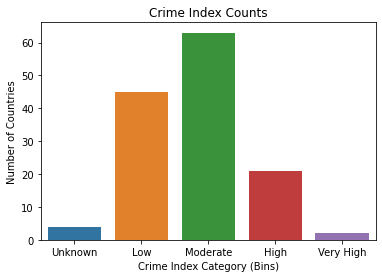

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

ax = sns.countplot(df_bins['Crime_Bins'])
ax.set_title("Crime Index Counts")
ax.set_xlabel("Crime Index Category (Bins)")
ax.set_ylabel("Number of Countries")
plt.show()


3. What does the bar chart tell you about the distribution of Crime Indices among the surveyed countries? 

It centers around moderate and low.

### TODO 5

1. Now lets deal with the missing values in the data set. Again we will use KNN imputer which replaces missing values with the "nearest neighbors". Run the following code to impute the dataset. 

Recall that Registered Firearms and Unregistered firearms are currently considered objects (categorical variables), but should be classified as numeric (floats). Thus we will convert these two columns before imputation. 

In [9]:
#make a copy of the dataset
df_bin_knn = df_drop.copy()

#Remove commas in the data values before transforming data type
df_bin_knn['Registered firearms']=df_bin_knn['Registered firearms'].str.replace(',','')
df_bin_knn['Unregistered firearms']=df_bin_knn['Unregistered firearms'].str.replace(',','')

#transform string data types to float (numeric) for imputation (cannot calculate means on strings)
df_bin_knn['Unregistered firearms']=pd.to_numeric(df_bin_knn['Unregistered firearms'])
df_bin_knn['Registered firearms']=pd.to_numeric(df_bin_knn['Registered firearms'])

#show data types after transformation
df_bin_knn.dtypes 

Country or subnational area                       object
Estimate of civilian firearms per 100 persons    float64
Region                                            object
Subregion                                         object
Population 2017                                    int64
Estimate of firearms in civilian possession      float64
Registered firearms                              float64
Unregistered firearms                            float64
Crime Index                                      float64
Safety Index                                     float64
dtype: object

Recall that inputing data using KNN requires that we use only numeric data. So let's extract just the numeric data from the data frame. 

In [10]:
#keep only numeric columns
df_num=df_bin_knn._get_numeric_data()
df_num

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index
0,12.5,34169000,4270000.0,NaN,NaN,77.01,22.99
1,12.0,2911000,350000.0,65747.0,284253.0,46.08,53.92
2,2.1,41064000,877000.0,200000.0,677000.0,53.82,46.18
3,0.7,56000,400.0,250.0,150.0,NaN,NaN
4,14.1,69000,10000.0,7599.0,2401.0,NaN,NaN
...,...,...,...,...,...,...,...
225,18.5,31926000,5895000.0,NaN,NaN,83.58,16.42
226,1.6,95415000,1562000.0,NaN,NaN,45.81,54.19
227,52.8,28120000,14859000.0,NaN,NaN,NaN,NaN
228,0.9,17238000,158000.0,86642.0,71358.0,46.28,53.72


2. Now let's run KNN imputer to fill in the missing values. 

In [11]:
from sklearn.impute import KNNImputer

#run knn imputer on df_num data frame (numeric columns)
imp = KNNImputer(n_neighbors=5, weights='uniform')
df_bin_knn = pd.DataFrame(imp.fit_transform(df_num))

#keep orginal column names
df_bin_knn.columns = df_num.columns

display(df_bin_knn)

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index
0,12.5,34169000.0,4270000.0,426202.2,660797.8,77.010,22.990
1,12.0,2911000.0,350000.0,65747.0,284253.0,46.080,53.920
2,2.1,41064000.0,877000.0,200000.0,677000.0,53.820,46.180
3,0.7,56000.0,400.0,250.0,150.0,41.834,58.166
4,14.1,69000.0,10000.0,7599.0,2401.0,41.834,58.166
...,...,...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8,83.580,16.420
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8,45.810,54.190
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0,52.298,47.702
228,0.9,17238000.0,158000.0,86642.0,71358.0,46.280,53.720


In [12]:
#Check for missing values after imputation. 
#If false, we have filled all the missing values, 
#if True, something didn't work right!
np.any(df_bin_knn.isna())

False

3. Now set the bin values: 

In [13]:
#sets the bin values
bins = [-np.inf, 20, 40, 60, 80, np.inf]

#Creates a new column with the bin labels
df_bin_knn['Crime_Bins'] = pd.cut(df_bin_knn['Crime Index'], 
                        bins,
                        labels = ["Unknown", "Low", "Moderate", "High", "Very High"])

#Creates a new column with the bin order (ordinal variable)
scale_mapper = {"Unknown":0, "Low":1, "Moderate":2, "High":3, "Very High":4}
df_bin_knn["Crime_Mapper"] = df_bin_knn["Crime_Bins"].replace(scale_mapper)

#show updated dataframe
df_bin_knn

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index,Crime_Bins,Crime_Mapper
0,12.5,34169000.0,4270000.0,426202.2,660797.8,77.010,22.990,High,3
1,12.0,2911000.0,350000.0,65747.0,284253.0,46.080,53.920,Moderate,2
2,2.1,41064000.0,877000.0,200000.0,677000.0,53.820,46.180,Moderate,2
3,0.7,56000.0,400.0,250.0,150.0,41.834,58.166,Moderate,2
4,14.1,69000.0,10000.0,7599.0,2401.0,41.834,58.166,Moderate,2
...,...,...,...,...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8,83.580,16.420,Very High,4
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8,45.810,54.190,Moderate,2
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0,52.298,47.702,Moderate,2
228,0.9,17238000.0,158000.0,86642.0,71358.0,46.280,53.720,Moderate,2


4. Just for kicks, let's join the imputed, numeric data frame to the categorical variables to view the entire dataset after imputation. 

In [14]:
#concatenate (join) the categorical and numerial variables into one dataset

#select only categorical columns from the df_drop dataframe, call this df_cat
df_cat = df_drop.select_dtypes(include=['object'])
df_bin_knn_full = pd.concat([df_cat, df_bin_knn], axis=1)

df_bin_knn_full

,Country or subnational area,Region,Subregion,Registered firearms,Unregistered firearms,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index,Crime_Bins,Crime_Mapper
0,Afghanistan,Asia,South Asia,NaN,NaN,12.5,34169000.0,4270000.0,426202.2,660797.8,77.010,22.990,High,3
1,Albania,Europe,Southern Europe,"65,747","284,253",12.0,2911000.0,350000.0,65747.0,284253.0,46.080,53.920,Moderate,2
2,Algeria,Africa,North Africa,"200,000","677,000",2.1,41064000.0,877000.0,200000.0,677000.0,53.820,46.180,Moderate,2
3,American Samoa,Oceania,Polynesia,250,150,0.7,56000.0,400.0,250.0,150.0,41.834,58.166,Moderate,2
4,Andorra,Europe,Southern Europe,"7,599","2,401",14.1,69000.0,10000.0,7599.0,2401.0,41.834,58.166,Moderate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Venezuela,Americas,South America,NaN,NaN,18.5,31926000.0,5895000.0,357065.2,625134.8,83.580,16.420,Very High,4
226,Vietnam,Asia,South-East Asia,NaN,NaN,1.6,95415000.0,1562000.0,2063843.2,5480956.8,45.810,54.190,Moderate,2
227,Yemen,Asia,Western Asia,NaN,NaN,52.8,28120000.0,14859000.0,1303536.0,2764864.0,52.298,47.702,Moderate,2
228,Zambia,Africa,East Africa,"86,642","71,358",0.9,17238000.0,158000.0,86642.0,71358.0,46.280,53.720,Moderate,2


5. Now let's Visualize the distribution. Here we will need to use the numeric dataframe that we previously called df_bin_knn. 

C:\Users\12524\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


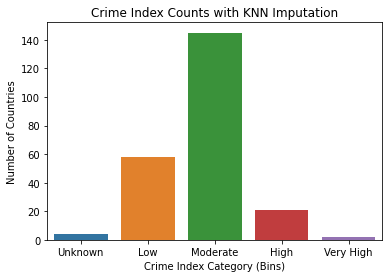

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

ax = sns.countplot(df_bin_knn['Crime_Bins'])
ax.set_title("Crime Index Counts with KNN Imputation")
ax.set_xlabel("Crime Index Category (Bins)")
ax.set_ylabel("Number of Countries")
plt.show()

6. Compare the distribution with knn imputation to the distribution of raw data we created above  without imputation (meaning that there are missing values) (recreated below for easy reference). 

C:\Users\12524\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


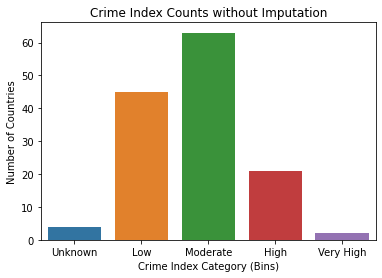

In [16]:
ax = sns.countplot(df_bins['Crime_Bins'])
ax.set_title("Crime Index Counts without Imputation")
ax.set_xlabel("Crime Index Category (Bins)")
ax.set_ylabel("Number of Countries")
plt.show()

7. Answer the following questions: 
- How did the imputation change the distribution of the data?
- Do you think this is okay? Why or why not? 
- Should we move forward with the analysis? 
- What considerations will you make moving forward given how the imputation affected the dataset?

1. It changed how many moderates were in the data.
2. I think that it is okay because it keeps almost the same distribution of the data.
3. We should move forward with the analysis because the data is filled and is still accurate.
4. I would consider how much the data could be differed and inaccurate since some of it was imputed.

## Applying Classification Algorithms for Prediction
For today, we are going to use the K Nearest Neighbors Classifier (though there are MANY others). Unlike in the Regression lab where we attempted to use linear regression to predict the Safety Index given a country's input, our goal here is to develop an algorithm that predicts which class a given country would fall into based on it's inputs. 

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other...The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

Read more about it here: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

For the sake of time and getting through this lab, let's move forward with the knn-imputed dataset.

### TODO 6
First, we need to partition our data into the target and input data (like we did last lab). 

1. Which variables/attributes should be held in X?

 The predictor variables like registered and unregistered firearms.

2. Which variables/attributes should be held in T?

The target variable like the safety index.

3. Run the cell below to partition the data.

In [17]:
X_knn = df_bin_knn.iloc[:, :5]
T = df_bin_knn.iloc[:, -1]
X_knn

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms
0,12.5,34169000.0,4270000.0,426202.2,660797.8
1,12.0,2911000.0,350000.0,65747.0,284253.0
2,2.1,41064000.0,877000.0,200000.0,677000.0
3,0.7,56000.0,400.0,250.0,150.0
4,14.1,69000.0,10000.0,7599.0,2401.0
...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0
228,0.9,17238000.0,158000.0,86642.0,71358.0


In [18]:
T

0      3
1      2
2      2
3      2
4      2
      ..
225    4
226    2
227    2
228    2
229    2
Name: Crime_Mapper, Length: 230, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

### TODO 7
Now we need to partition the data into the train and test set using train_test_split.

1. Run the following code to do so

In [19]:
# TODO: import proper library
from sklearn.model_selection import train_test_split

# TODOL partition the iris data
X_train, X_test, t_train, t_test = train_test_split(X_knn, T, test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (184, 5)
Train target shape: (184,)
Test data shape: (46, 5)
Test target shape: (46,)


2. Now that we have our data split into the train and test set, let's apply the KNN classifier. Here the KNN classifer is an algorithm that assigns each observation to its probable target bin (Crime Index Category). Once it is fit to the train data, the same algorithm is applied to the test data. The test data is classified according to the algorithm. If the KNN classifier has a high accuracy score, it means it classified most of the observations correctly.   

KNN> Train Accuracy: 0.7336956521739131, Test Accuracy: 0.6086956521739131


Text(0.5, 0.98, 'KNN Classification for Civilian Gun Ownership and Crime Index')

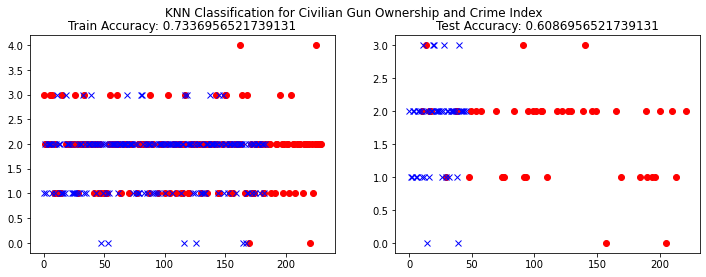

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#*****SET THE NUMBER OF NEAREST NEIGHBORS
knn = KNeighborsClassifier(n_neighbors=3)

# Fit your `KNN` instance using the train data and labels.
knn.fit(X_train, t_train)

# TODO 2: Compute the accuracy of the learned classifier using the train/test data and labels.
train_score = knn.score(X_train, t_train)
test_score = knn.score(X_test, t_test)
    
# TODO 3: print out classifier, train and test accuracy
print("{}> Train Accuracy: {}, Test Accuracy: {}".format("KNN", train_score, test_score))


# TODO 4: Compute the triain and test predictions.
y_train = knn.predict(X_train)
y_test = knn.predict(X_test)

plt.figure(figsize=(12,4))
plt.subplot(121)

# TODO 5: Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.cv
plt.plot(t_train, 'ro')
plt.plot(y_train, 'bx')
plt.title("Train")
plt.title("Train Accuracy: {}".format(train_score))

plt.subplot(122)

# TODO 6: Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_test, 'ro')
plt.plot(y_test, 'bx')
plt.title("Test")
plt.title("Test Accuracy: {}".format(test_score))
    
# TODO 7: show the title with classifier and dataset name
plt.suptitle("KNN Classification for Civilian Gun Ownership and Crime Index")

In [21]:
#Save output labels from both the train and test sets as dataframe for later
df_knn_labels = pd.concat([t_test, t_train], axis=0)
knn_labels = df_knn_labels.to_numpy()

#view as data frame
df_knn_labels.head()

210    2
110    1
157    0
69     2
101    2
Name: Crime_Mapper, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [22]:
#view as array
knn_labels

array([2, 1, 0, 2, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2, 2,
       2, 3, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 1, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 1, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 3, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 4, 2, 1, 2, 1, 2, 2, 4, 2], dtype=int64)

WHOA! So what the heck does this mean? 

Well, let's break it down. 
First, we split the data into the 
- Target variable: Crime Index Categories
- Predictor variables: 
    - Estimate of civilian firearms per 100 persons	
    - Population 2017	
    - Estimate of firearms in civilian possession	
    - Registered firearms	
    - Unregistered firearms
    
Next, We then stored 80% of the observations and put them in the train set and stored the other 20% in the test set. 

Finally, we then fit the K-Nearest Neighbors classifier (algorithm) USING 3 NEAREST NEIGHBORS to the train set, and applied the algorithm to the test set. The results of the KNN classifer (with 3 neighbors) on the train set is depicted on the left and the test set on the right. For both, an accuracy score is given at the top. Note that the accuracy can be interpreted as: 
    1.0 = 100% of the observations were classified correctly
    0.0 = 0% of the observations were classified correctly. 

Recall that we binned the Crime Indexes according to the following: 
- 0: missing
- 1: low
- 2: moderate
- 3: high
- 4: very high

These values are shown on the y-axis. 

The observation/sample number is shown on the x-axis. 

3. With that being said, what can you say about the results of our model? 
- how well did it fit to the train data? 
- how well did it predict the test data? 
- did it seem to predict specific bins better than others? (hint: look at the values on the y-axix


1. It fit the train data pretty well, but was not close to perfect.
2. It did not predict the test data very well. It was almost a coin flip deciding if it would predict it or not.
3. It predicted countries with a 2 rating better than any other rating.

## Adjusting k in KNN Classification: 

In KNN classification, we set our desired number of nearest neighbors. This is an example of a hyperparameter in that it is a parameter that we set ourselves, rather than letting the algorithm do it for us. This is an arbitrary process that relies on the data scientist to adjust as needed and according to the data set they are working with. If you notice, we started with 3 neighbors in the code above. 

The value of k in the KNN algorithm is related to the error rate of the model. The results of our model indicated that 79% of the train data were classified correctly while only 54% of the test data were classified correctly. This indicates that our training data was "overfit." Overfitting implies that the model performed well on the training data but has poor performance when new data is coming.  A small value of k could lead to overfitting as well as a big value of k can lead to underfitting. 

Read more about overfitting and KNN here: 
- https://www.codecademy.com/learn/introduction-to-supervised-learning-skill-path/modules/k-nearest-neighbors-skill-path/cheatsheet#:~:text=The%20value%20of%20k%20in,when%20new%20data%20is%20coming.
- https://towardsdatascience.com/k-nearest-neighbors-94395f445221

### TODO 8:
1. To see how the value of k affects the accuracy of the classifier, replace the "n_neighbors=" value in the code below with as many different values as you need to find the optimal accuracy score.  

KNN> Train Accuracy: 0.6956521739130435, Test Accuracy: 0.6521739130434783


Text(0.5, 0.98, 'KNN Classification for Civilian Gun Ownership and Crime Index')

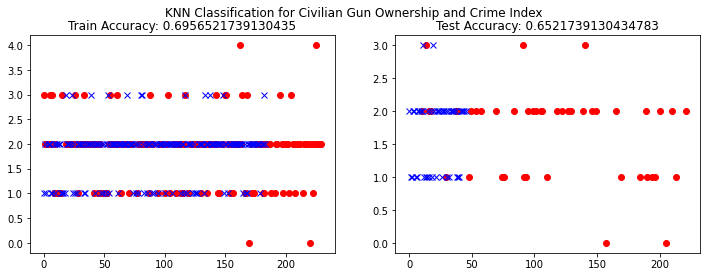

In [54]:
from sklearn.neighbors import KNeighborsClassifier

#*****SET THE NUMBER OF NEAREST NEIGHBORS
knn = KNeighborsClassifier(n_neighbors=5)

# Fit your `KNN` instance using the train data and labels.
knn.fit(X_train, t_train)

# TODO 2: Compute the accuracy of the learned classifier using the train/test data and labels.
train_score = knn.score(X_train, t_train)
test_score = knn.score(X_test, t_test)
    
# TODO 3: print out classifier, train and test accuracy
print("{}> Train Accuracy: {}, Test Accuracy: {}".format("KNN", train_score, test_score))


# TODO 4: Compute the triain and test predictions.
y_train = knn.predict(X_train)
y_test = knn.predict(X_test)

plt.figure(figsize=(12,4))
plt.subplot(121)

# TODO 5: Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.cv
plt.plot(t_train, 'ro')
plt.plot(y_train, 'bx')
plt.title("Train")
plt.title("Train Accuracy: {}".format(train_score))

plt.subplot(122)

# TODO 6: Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_test, 'ro')
plt.plot(y_test, 'bx')
plt.title("Test")
plt.title("Test Accuracy: {}".format(test_score))
    
# TODO 7: show the title with classifier and dataset name
plt.suptitle("KNN Classification for Civilian Gun Ownership and Crime Index")

2. What did you find? How many nearest neighbors should you use to get the best accuracy? 

I found that 5 nearest neighbors gave moderate accuracy. It gave me 70% training set accuracy and 65% test accuracy.

3. Did you notice anything interesting about the accuracy scores as you tested different values of k? 

The lower the k, the better accuracy the training set will have, and the higher the k, the worse accuacy it will have.

# K-Means Clustering
Now that we've tried out two supervised learning techniques on this dataset. Let's try an unsupervised technique, that is, K-Means clustering. 

Read more about K-Means clustering here: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

## Visualize the Gun Data
### TODO 10
1. First let's gather up our data again. We need to use numeric data so let's use the df_num dataframe and apply knn-imputation. 

In [24]:
df_num 

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index
0,12.5,34169000,4270000.0,NaN,NaN,77.01,22.99
1,12.0,2911000,350000.0,65747.0,284253.0,46.08,53.92
2,2.1,41064000,877000.0,200000.0,677000.0,53.82,46.18
3,0.7,56000,400.0,250.0,150.0,NaN,NaN
4,14.1,69000,10000.0,7599.0,2401.0,NaN,NaN
...,...,...,...,...,...,...,...
225,18.5,31926000,5895000.0,NaN,NaN,83.58,16.42
226,1.6,95415000,1562000.0,NaN,NaN,45.81,54.19
227,52.8,28120000,14859000.0,NaN,NaN,NaN,NaN
228,0.9,17238000,158000.0,86642.0,71358.0,46.28,53.72


In [55]:
from sklearn.impute import KNNImputer

#run knn imputer on df_num data frame (numeric columns)
imp = KNNImputer(n_neighbors=5, weights='uniform')
df_knn = pd.DataFrame(imp.fit_transform(df_num))

#keep orginal column names
df_knn.columns = df_num.columns

display(df_knn)

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index
0,12.5,34169000.0,4270000.0,426202.2,660797.8,77.010,22.990
1,12.0,2911000.0,350000.0,65747.0,284253.0,46.080,53.920
2,2.1,41064000.0,877000.0,200000.0,677000.0,53.820,46.180
3,0.7,56000.0,400.0,250.0,150.0,41.834,58.166
4,14.1,69000.0,10000.0,7599.0,2401.0,41.834,58.166
...,...,...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8,83.580,16.420
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8,45.810,54.190
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0,52.298,47.702
228,0.9,17238000.0,158000.0,86642.0,71358.0,46.280,53.720


2. Now, partition the df_knn dataframe so that we are only working with input (predictor) variables. Recall that in unsupervised learning, we do not need a target variable.

In [56]:
df_knn_X = pd.DataFrame(df_knn.iloc[:,:5]) 

df_knn_X

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms
0,12.5,34169000.0,4270000.0,426202.2,660797.8
1,12.0,2911000.0,350000.0,65747.0,284253.0
2,2.1,41064000.0,877000.0,200000.0,677000.0
3,0.7,56000.0,400.0,250.0,150.0
4,14.1,69000.0,10000.0,7599.0,2401.0
...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0
228,0.9,17238000.0,158000.0,86642.0,71358.0


### Scale the data 
3. Recall that our variables use different scales. Thus we need to scale the data using Standard scaler. 

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df_knn_X))
df_scale.columns = df_knn_X.columns

# Preview data
df_scale

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms
0,0.216484,0.011199,0.020335,-0.099223,-0.096449
1,0.176271,-0.225842,-0.126685,-0.374575,-0.110707
2,-0.619939,0.063486,-0.106920,-0.272019,-0.095835
3,-0.732534,-0.247493,-0.139797,-0.424608,-0.121465
4,0.345164,-0.247394,-0.139436,-0.418994,-0.121380
...,...,...,...,...,...
225,0.699035,-0.005811,0.081280,-0.152037,-0.097799
226,-0.660151,0.475650,-0.081229,1.151769,0.086071
227,3.457621,-0.034673,0.417474,0.570971,-0.016776
228,-0.716449,-0.117195,-0.133886,-0.358613,-0.118768


### Normalize the data 
4. We also want to make sure the data follows a normal distribution. Run the code below to normalize the data. 

In [28]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='max')

df_norm = pd.DataFrame(scaler.fit_transform(df_scale))
df_norm.columns = df_scale.columns


df_norm.describe()

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,-0.246509,-0.265174,-0.192590,-0.389902,-0.181328
std,0.839424,0.373660,0.181338,0.617155,0.165381
min,-1.000000,-1.000000,-0.605080,-1.000000,-0.625431
25%,-1.000000,-0.547158,-0.324085,-0.832228,-0.286164
50%,-0.731322,-0.314362,-0.197641,-0.559374,-0.175949
75%,0.762263,-0.105103,-0.123361,-0.219310,-0.136445
max,1.000000,1.000000,0.991877,1.000000,1.000000


5. Now store the transformed data in X 

In [29]:
X = df_norm

X

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms
0,1.000000,0.051730,0.093931,-0.458341,-0.445524
1,0.470590,-0.602929,-0.338210,-1.000000,-0.295553
2,-1.000000,0.102407,-0.172468,-0.438784,-0.154588
3,-1.000000,-0.337858,-0.190840,-0.579643,-0.165814
4,0.823792,-0.590448,-0.332789,-1.000000,-0.289693
...,...,...,...,...,...
225,1.000000,-0.008313,0.116275,-0.217496,-0.139906
226,-0.573163,0.412973,-0.070525,1.000000,0.074729
227,1.000000,-0.010028,0.120740,0.165134,-0.004852
228,-1.000000,-0.163578,-0.186874,-0.500543,-0.165774


## Dimensionality Reduction

High dimensionality of data causes various problems known as *Curse of dimensionality*. One notable thing that we can easily assume is the computational complexity. Also, the model performance (accuracy and stability) drops very quickly as the complexity of problem surges when the dimensionality grows.  

For now, let us practice simple Principal Component Analysis (PCA) just for tasting.
PCA captures the largest amount of variation in data, so we can discard pricipal components that have low variations(so less impact on model prediction).

As an example, do you remember that many of the weights of the linear regression models are close to zero? Maybe the linear model does not use many of the input variables. The same idea applies to clustering. That is, maybe some of the variables do not affect the classification enough to include them in the algorithm. In fact, using all of the variables may actually create more noise in the data!

### Principle Component Analysis (PCA)
### TODO 11
1. Let's use Principle Component Analysis (PCA) to reduce the number of dimensions. Let's chose three components to start.

Read more here: https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [57]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#SET NUMBER OF PRINCIPLE COMPONENTS
pca = PCA(3)
 
#Transform the data
X_pca = pca.fit_transform(X)
 
X_pca.shape

(230, 3)

### So how can you tell how much information is retained in your PCA?
We use Explained Variance Ratio as a metric to evaluate the usefulness of your principal components and to choose how many components to use in your model. The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

Read more here: https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6#:~:text=The%20explained%20variance%20ratio%20is,or%2080%25%20to%20avoid%20overfitting.

In [31]:
# percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.60175708, 0.3315062 , 0.05345396])

## Apply K-Means to the Data
### TODO 12
1. Now, let’s apply K-means to our data to create the clusters.

From our classification task, we know that the Crime Index labels range from 0 to 4, so we are anticipating 5 classes (or clusters). However, given that clustering does not use a target variable, it may not group the observations according to those categories. Instead, it groups observations according to similar characteristics of the input values. 

In real-life, when performing K-means the most challenging task is to determine the number of clusters. There are various methods to determine the optimum number of clusters, i.e. Elbow method, Average Silhouette method. Due to a lack of time, we will not cover these. 

Read more here: https://www.askpython.com/python/examples/plot-k-means-clusters-python 

In [58]:
from sklearn.cluster import KMeans

#SET NUMBER OF CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=0)

#fit the kmeans algorithm to the input data. 
#Title the output as "label" so that we can visualize the cluster labels later
label = kmeans.fit_predict(X_pca)

# Transfom the output into a dataframe for use later
labels = pd.DataFrame(label)
labels.columns =['Cluster label']

print(label)
labels

[0 3 4 4 3 2 1 2 1 1 2 0 4 0 3 4 1 1 0 3 4 1 4 4 0 1 2 4 4 1 4 4 1 4 0 1 3
 4 4 3 0 2 4 2 4 4 3 0 4 1 0 0 3 1 1 1 4 4 4 4 3 2 3 4 1 1 2 0 3 4 0 2 0 1
 1 1 3 2 2 1 0 0 1 3 3 0 4 4 3 4 4 0 4 3 0 2 4 2 0 1 1 2 1 3 4 0 4 4 4 0 0
 1 4 3 0 1 4 3 0 3 0 1 4 4 4 1 4 0 4 3 4 1 2 4 1 0 1 0 1 4 4 4 0 4 4 4 0 0
 1 4 2 4 0 0 3 1 0 0 2 4 4 3 4 0 4 2 4 0 3 3 0 0 4 2 4 1 1 3 1 3 3 0 1 4 0
 1 1 4 4 1 1 0 4 3 3 2 4 3 2 4 4 3 2 0 1 4 4 4 2 4 1 1 4 2 4 1 4 0 4 2 0 0
 0 4 1 0 2 0 4 4]


,Cluster label
0,0
1,3
2,4
3,4
4,3
...,...
225,0
226,2
227,0
228,4


As you can see, the kmeans.fit_predict method returns the array of cluster labels each data point belongs to. That is, it assigns each observation a probably bin (classification group).

## Visualizing Clusters
### Plotting Individual K-Means Clusters
### TODO 13
Now, it’s time to understand how can we plot individual clusters.

The array of labels preserves the index or sequence of the data points, so we can utilize this characteristic to filter data points using Boolean indexing with numpy.

1. Let’s visualize cluster with label 0 using the matplotlib library.

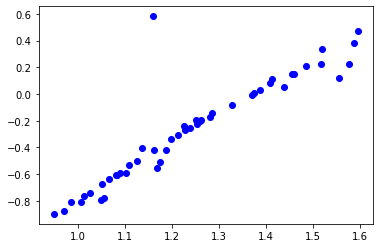

In [33]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = X_pca[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], color='blue')

plt.show()

The code above first filters and keeps the data points that belong to cluster label 0 and then creates a scatter plot.

See how we passed a Boolean series to filter [label == 0]. Indexed the filtered data and passed to plt.scatter as (x,y) to plot. x = filtered_label0[:, 0] , y = filtered_label0[:, 1].

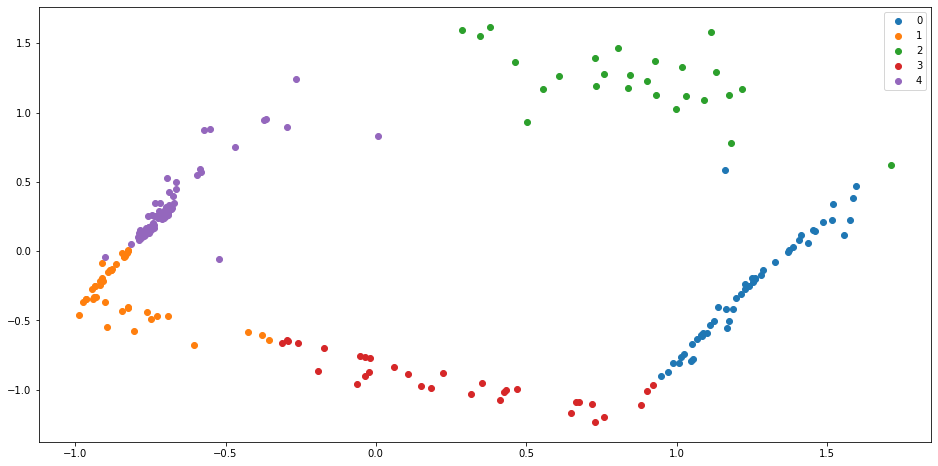

In [34]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(16,8))

for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)

plt.legend()
plt.show()

The above code iterates filtering the data according to each unique class one iteration at a time. The result we get is the final visualization of all the clusters.

2. What do you think about the clusters the algorithm created? Do they seem plausible? Do you think that there should be more or less clusters to accurately fit the data? 

I think that it is fairly accurate, but could be better. There should be one less cluster in this data.

Now lets plot the cluster centers (centroids). 

## Plotting the Cluster Centroids

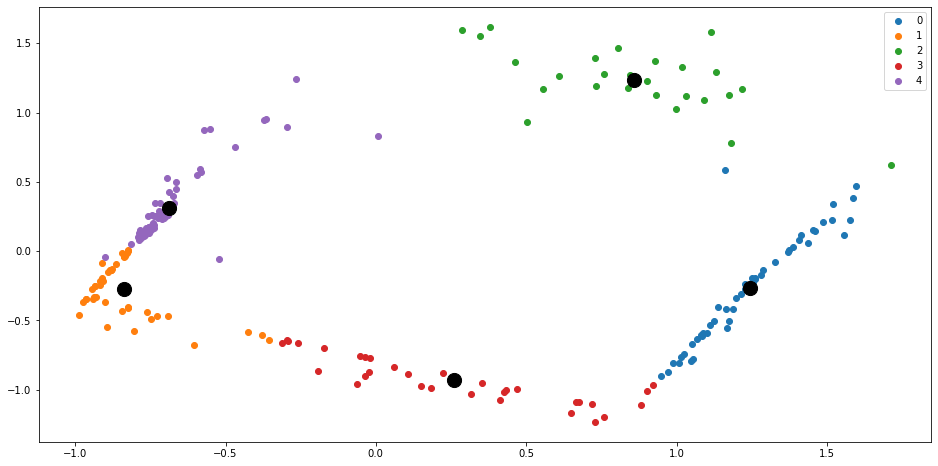

In [35]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(16,8))

for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'k')
plt.legend()
plt.show()

In [36]:
kmeans.cluster_centers_

array([[ 1.24375311, -0.26504788, -0.05435404],
       [-0.8367917 , -0.27274742,  0.09596131],
       [ 0.85721585,  1.2353784 ,  0.13479022],
       [ 0.25906551, -0.9302828 ,  0.00973166],
       [-0.68674212,  0.30862745, -0.07451043]])

## Adjusting Hyperparameters for Better Models
The code you ran above the apply PCA and Kmeans Clustering then plotting the clusters and centroids has been combined into a single code below. 

The hyperparameters (parameters we select) of this code include the number of principle components we chose in PCA and the number of clusters we chose in Kmeans clustering. 

### TODO 14
1. Test out some different values for 
- Number of principle components, and 
- Number of clusters
to find the optimal number of principle componenets and number of clusters. Our goal is to find the optimal number of clusters that separates the data into clear groups, that is, in which the grouped observations do not overlap. 

[3 2 1 1 2 0 1 0 1 1 0 3 1 3 2 1 1 1 3 2 1 1 1 1 3 1 0 1 1 1 1 1 1 1 3 1 2
 1 1 2 3 0 1 0 1 1 2 3 1 1 3 3 2 1 1 1 1 1 1 1 2 0 2 1 1 1 0 3 2 1 3 0 3 1
 1 1 2 0 0 1 3 3 1 2 2 3 1 1 2 1 1 3 1 2 3 0 0 0 3 1 1 0 1 2 1 3 1 1 1 3 3
 1 1 2 3 1 1 2 3 2 3 1 1 1 1 1 1 3 1 2 1 2 0 1 1 3 2 3 1 1 1 0 3 1 1 1 3 3
 1 1 0 1 3 3 2 1 3 3 0 1 1 2 1 3 1 0 1 3 2 2 3 3 1 0 1 1 1 2 1 2 2 3 1 1 3
 1 1 1 1 1 1 3 1 2 2 0 1 2 0 1 1 2 3 3 1 1 1 1 0 1 2 1 1 0 1 1 1 3 1 0 3 3
 3 1 1 3 0 3 1 1]


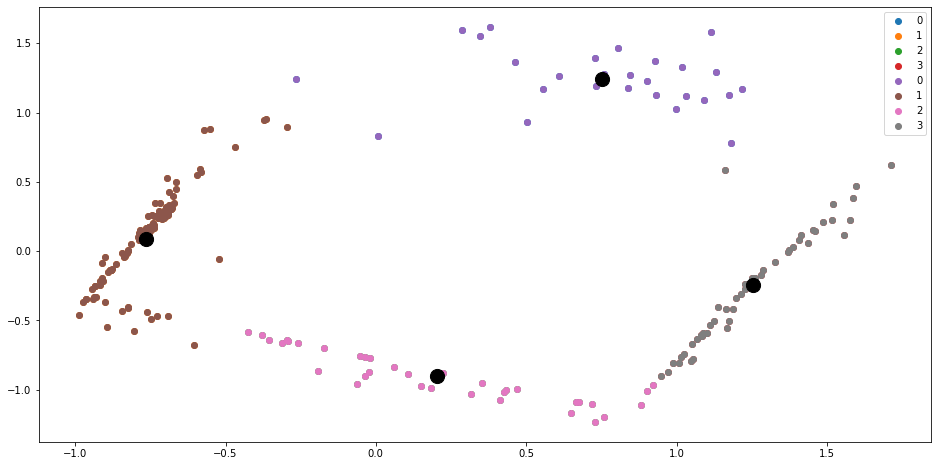

In [65]:
#Import required packages
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


#PCA
#****SET NUMBER OF PRINCIPLE COMPONENTS
pca = PCA(4)
 
#Transform the data
X_pca = pca.fit_transform(X)



#Kmeans CLUSTERING
#****SET NUMBER OF CLUSTERS
kmeans = KMeans(n_clusters=4, random_state=0)

#fit the kmeans algorithm to the input data. 
#Title the output as "label" so that we can visualize the cluster labels later
label = kmeans.fit_predict(X_pca)

# Transfom the output into a dataframe for use later
labels = pd.DataFrame(label)
labels.columns =['Cluster label']

print(label)
labels



#PLOT CLUSTERS
#Getting cluster labels
u_labels = np.unique(label)
 
#plotting cluster labels
plt.figure(figsize=(16,8))
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)



#PLOT CENTROIDS
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the Centroids:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'k')
plt.legend()
plt.show()

2. What did you find? What is the optimal number of clusters and principle components? Why do you think that?


The optimal amount of clusters and principle components is 4. I think this because in the data, it looks like a square. Since squares have 4 sides, every side would be a cluster.

## Classification v. Clustering
Now let's see how our classification and clustering results compare. In both, we are trying to group observations. In classification, we are grouping them according to our predefined Safety Index categories. In clustering, the algorithm groups the observations according to similar characteristics within the imput data. 

1. With this in mind, and in the context of this dataset. What do you think the clustering application tells us about the data? 

2. What do you think the classification application tells us about the data? 

Just for kicks, let's see if the clustering algorithm grouped the data similarly or different from the classification algorithm. To do this, we will join the cluster label dataframe we created earlier with the original, imputed data set. 

3. Run the code to join the data

In [38]:
# Create a new dataset with the assigned Clusters for each observation

cluster_df = pd.concat([df_knn, labels], axis=1)
cluster_df

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index,Cluster label
0,12.5,34169000.0,4270000.0,426202.2,660797.8,77.010,22.990,3
1,12.0,2911000.0,350000.0,65747.0,284253.0,46.080,53.920,2
2,2.1,41064000.0,877000.0,200000.0,677000.0,53.820,46.180,1
3,0.7,56000.0,400.0,250.0,150.0,41.834,58.166,1
4,14.1,69000.0,10000.0,7599.0,2401.0,41.834,58.166,2
...,...,...,...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8,83.580,16.420,3
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8,45.810,54.190,0
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0,52.298,47.702,3
228,0.9,17238000.0,158000.0,86642.0,71358.0,46.280,53.720,1


In [39]:
#Join classification results labels column
result_df = pd.concat([cluster_df, df_knn_labels], axis=1)
result_df

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index,Cluster label,Crime_Mapper
0,12.5,34169000.0,4270000.0,426202.2,660797.8,77.010,22.990,3,3
1,12.0,2911000.0,350000.0,65747.0,284253.0,46.080,53.920,2,2
2,2.1,41064000.0,877000.0,200000.0,677000.0,53.820,46.180,1,2
3,0.7,56000.0,400.0,250.0,150.0,41.834,58.166,1,2
4,14.1,69000.0,10000.0,7599.0,2401.0,41.834,58.166,2,2
...,...,...,...,...,...,...,...,...,...
225,18.5,31926000.0,5895000.0,357065.2,625134.8,83.580,16.420,3,4
226,1.6,95415000.0,1562000.0,2063843.2,5480956.8,45.810,54.190,0,2
227,52.8,28120000.0,14859000.0,1303536.0,2764864.0,52.298,47.702,3,2
228,0.9,17238000.0,158000.0,86642.0,71358.0,46.280,53.720,1,2


It's tough to see here, but what we're looking to see is if the cluster labels align with the Crime Index Categories we binned in the classification task. 

In [40]:
result_df.sort_values("Cluster label")

,Estimate of civilian firearms per 100 persons,Population 2017,Estimate of firearms in civilian possession,Registered firearms,Unregistered firearms,Crime Index,Safety Index,Cluster label,Crime_Mapper
195,9.7,5.543600e+07,5351000.0,3000000.0,2351000.0,76.060,23.940,0,3
132,12.9,1.302230e+08,16809000.0,3118592.0,13690408.0,53.680,46.320,0,2
43,10.1,4.906800e+07,4971000.0,706210.0,4264790.0,57.710,42.290,0,2
41,3.6,1.388233e+09,49735000.0,680000.0,49055000.0,29.390,70.610,0,1
141,1.6,5.483600e+07,877000.0,1006850.2,860749.8,46.510,53.490,0,2
...,...,...,...,...,...,...,...,...,...
120,18.9,5.840000e+05,110000.0,86000.0,24000.0,35.710,64.290,3,1
118,28.8,3.800000e+04,11000.0,440.8,1119.2,40.282,59.718,3,2
110,16.7,4.100000e+06,685000.0,39000.0,646000.0,33.410,66.590,3,1
184,39.1,6.946000e+06,2719000.0,1186086.0,1532914.0,38.290,61.710,3,1


4. Do you think they classified groups the same way or differently? Why or why not? 

### Let's create a visualization to make it clearer: 
Read about making visualizations using pyplot here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

5. run the following code to create a visualization comparing the results of the classification v. clustering algorithms

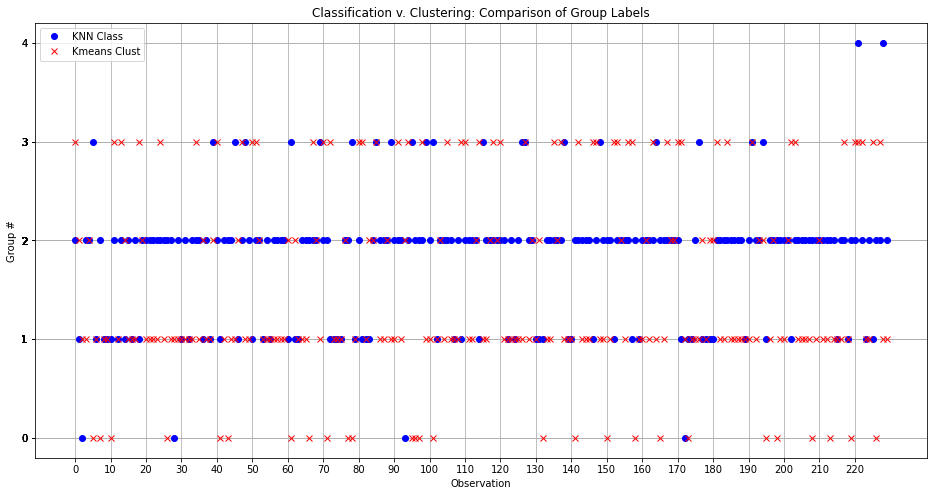

In [41]:
#set figure size
plt.figure(figsize=(16,8))

#plot classification prediction results 
plt.plot(knn_labels, 'bo', label='KNN Class')

#plot cluster prediction results 
plt.plot(result_df["Cluster label"], 'rx', label="Kmeans Clust")

#Format graph
#make x ticks go up by tens
plt.xticks(np.arange(0,230,step=10))
#make y ticks group numbers
plt.yticks(knn_labels)
plt.ylabel("Group #")
plt.xlabel("Observation")
plt.title("Classification v. Clustering: Comparison of Group Labels")
#show grid
plt.grid()
#show legend
plt.legend()
#print grwph
plt.show()

6. Start by looking at observation 0. Which group was it assigned by the classification algorithm? 

Group 2

7. Which group was observation 0 assigned by the clustering algorithm? 

Group 3

8. Now scan the rest of the observations and their corresponding classifications by each algorithm. In general, do you think they classified the observations similarly or not? Why do you think this? 

They did not classify the observations similarly most of the time. I think this is because classification is classifying based on neighbors' information, and clustering is classifying based on similarity.

## Moving forward with your analysis

Now that we have our results, how will you move forward? 

Recall the following considerations to be made about considering which models to apply to your data. 

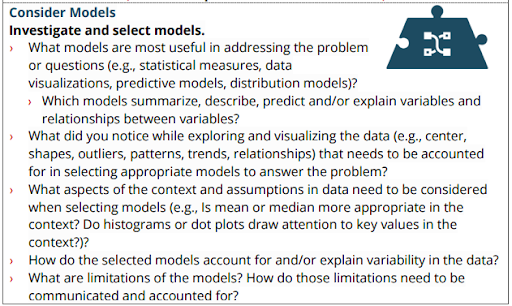

1. In the context of this dataset and the exploration you have done, what is an appropriate research question and corresponding modeling technique to use? Why did you choose this question and corresponding analysis method? 

Do countries with similar safety ratings relate with each other in geological location? This question would use a classifying technique. I chose this question because this can be easily shown through classification and it can answer real life questions.

Review the considerations that need to be made when communicating your results and proposing action. 

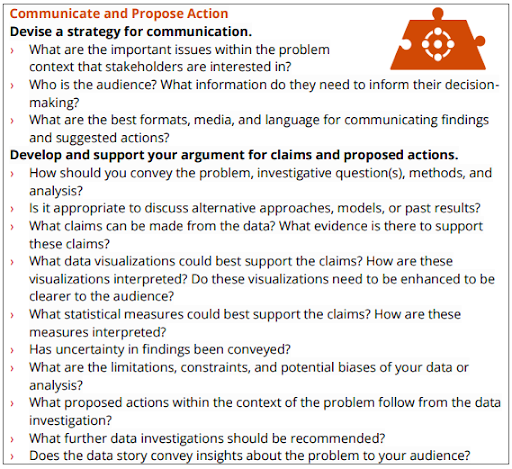

2. How should you go about communicating your findings? Or should you at all?! What steps would/should you take to improve your results and your interpretation of them? Explain your reasoning. 

I can communicate these findings by publishing the graphs of the data and explain what they mean. To improve my results, I can increase the accuracy of the model I made. I will do this because accurate and clear models are able to communicate information clearly to the public.

3. Are there any actions that you propose about gun ownership and safety based on your findings? 

I propose to have a moderate amount of guns in civilian possession to balance the positive and negative effects of them.

## Submission Directions

Once you are finished with this lab, go to File > Download As > Notebook (.ipynb). And save the file to your computer. Then upload the file to the Canvas Lab 4 Assignment.